# Self-Organizing Maps (SOM)
* Este exemplo mostra como usar o MiniSom para resolver um problema de classificação. O mecanismo de classificação será implementado com MiniSom e as métricas seram feitas usando do sklearn. Primeiramente é carregado um conjunto de dados (neste caso, o famoso conjunto de dados Iris).

In [1]:
from minisom import MiniSom
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


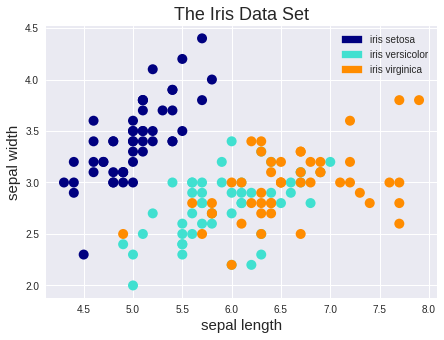

In [3]:
lengths = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
flower_type = data['Species']
plt.style.use('seaborn')
plt.figure(figsize=(7, 5))
for i in range(0,len(lengths)-1):
    x, y = [lengths[i][0], lengths[i][1]]
    scale = 100.0
    # determine color
    flower = flower_type[i]
    color = ""
    if flower == "Iris-setosa":
        color = "navy"
    elif flower == "Iris-versicolor":
        color = "turquoise"
    elif flower == "Iris-virginica":
        color = "darkorange"

    plt.scatter(x, y, s=scale, c=color, alpha=1, edgecolor="none")

# Legend
red_patch = mpatches.Patch(color='navy', label='iris setosa')
green_patch = mpatches.Patch(color='turquoise', label='iris versicolor')
blue_patch = mpatches.Patch(color='darkorange', label='iris virginica')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.title("The Iris Data Set", fontsize=18)
plt.xlabel(r'sepal length', fontsize=15)
plt.ylabel(r'sepal width', fontsize=15)

plt.show()

In [4]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
label_encoder = LabelEncoder()
data['Species']= label_encoder.fit_transform(data['Species'])
data['Species'].unique()

array([0, 1, 2])

In [6]:
X_data = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X_data = X_data.values
labels = data['Species']

## Classificação
* Aqui está a função de classificação simples que classifica uma amostra de dados usando o rótulo atribuído ao neurônio vencedor associado. Um rótulo $ c $ está associado a um neurônio se a maioria das amostras mapeadas naquele neurônio tiver o rótulo $ c $. A função atribuirá o rótulo mais comum no conjunto de dados no caso de uma amostra ser mapeada para um neurônio para o qual nenhuma classe foi atribuída.

In [7]:
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

* 1) dividir os dados em trem e conjunto de teste
* 2) treinar o Som
* 3) imprimir o relatório de classificação que contém todas as métricas para avaliar os resultados da classificação.

In [8]:


X_train, X_test, y_train, y_test = train_test_split(X_data, labels, stratify=labels)

som = MiniSom(x = 5, y = 5, input_len = 4, sigma=3, 
              learning_rate=0.5,  neighborhood_function='gaussian', random_seed=10, activation_distance='euclidean')

som.pca_weights_init(X_train)
som.train_random(X_train, 500, verbose=False)
y_pred = classify(som, X_test) 


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

